In [12]:
# Imports
import fastf1
import matplotlib as mpl
import matplotlib.pyplot as plt
from fastf1 import plotting
from timple.timedelta import strftimedelta
from fastf1.core import Laps
import pandas as pd

In [ ]:
year = 2021 #GP year
gp = 'Abu Dhabi' # GP name
event = 'Q' # Q for qualifying, FP1 for free practice 1, R for race

In [7]:

# Configure matplotlib and f1 plots with this intit
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['figure.figsize'] = (6,6)
fastf1.Cache.enable_cache(r"/Users/Professor/Downloads/f1/cache")
fastf1.plotting.setup_mpl()
fastf1.plotting.setup_mpl(mpl_timedelta_support = True, color_scheme = 'fastf1', misc_mpl_mods = False)


In [13]:

# Get qualification session
session = fastf1.get_session(year, gp, event)
laps = session.load_laps()
laps.dropna(subset=['Driver'], inplace = True)


core           INFO 	Loading laps for Abu Dhabi Grand Prix - Qualifying [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '33', '77', '11', '4', '22', '10', '55', '3', '16', '18', '31', '7', '99', '14', '5', '63', '6', '47', '9']


In [9]:

# Get an array of all drivers
drivers = pd.unique(laps['Driver'])
print(drivers)

# Get each driver fastest lap
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)


['HAM' 'VER' 'BOT' 'PER' 'NOR' 'TSU' 'GAS' 'SAI' 'RIC' 'LEC' 'STR' 'OCO'
 'RAI' 'GIO' 'ALO' 'VET' 'RUS' 'LAT' 'MSC' 'MAZ']


In [10]:

# Get the pole lap
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

# Get team colors
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)


   Driver                LapTime           LapTimeDelta
0     VER 0 days 00:01:22.109000        0 days 00:00:00
1     HAM 0 days 00:01:22.480000 0 days 00:00:00.371000
2     NOR 0 days 00:01:22.931000 0 days 00:00:00.822000
3     PER 0 days 00:01:22.947000 0 days 00:00:00.838000
4     SAI 0 days 00:01:22.992000 0 days 00:00:00.883000
5     TSU 0 days 00:01:23.011000 0 days 00:00:00.902000
6     BOT 0 days 00:01:23.036000 0 days 00:00:00.927000
7     LEC 0 days 00:01:23.122000 0 days 00:00:01.013000
8     OCO 0 days 00:01:23.389000 0 days 00:00:01.280000
9     RIC 0 days 00:01:23.409000 0 days 00:00:01.300000
10    ALO 0 days 00:01:23.460000 0 days 00:00:01.351000
11    GAS 0 days 00:01:23.489000 0 days 00:00:01.380000
12    STR 0 days 00:01:24.061000 0 days 00:00:01.952000
13    GIO 0 days 00:01:24.118000 0 days 00:00:02.009000
14    VET 0 days 00:01:24.225000 0 days 00:00:02.116000
15    LAT 0 days 00:01:24.338000 0 days 00:00:02.229000
16    RUS 0 days 00:01:24.423000 0 days 00:00:02

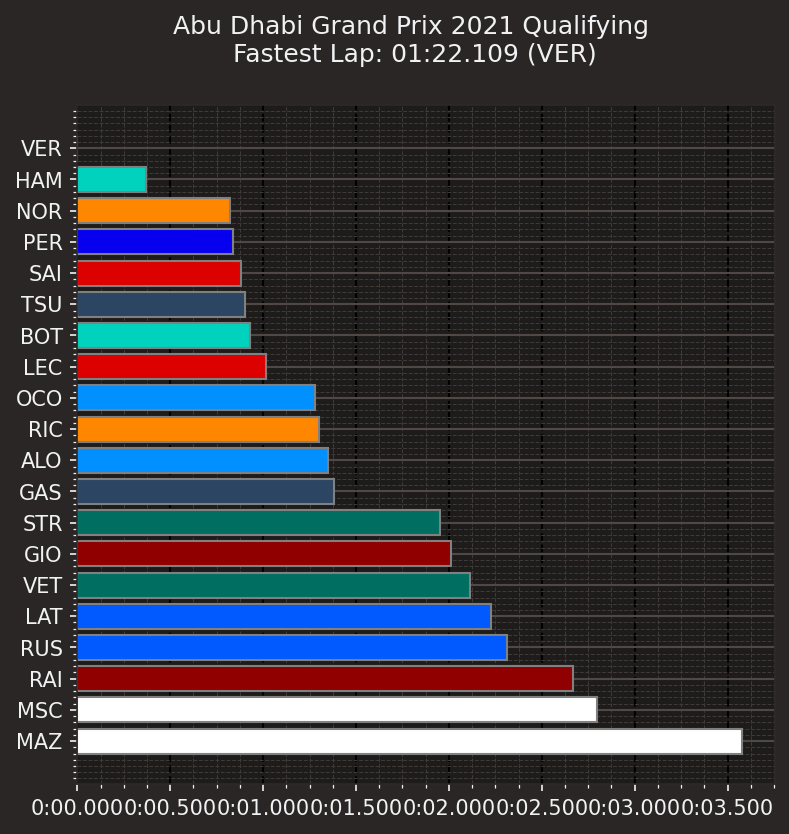

In [11]:

# Plot the table
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.weekend.name} {session.weekend.year} Qualifying \n"
f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plt.show()
